## MODEL DEVELOPMENT

#### SIMPLE LINEAR REGRESSION

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("/Users/cansezgin/Python-Output/automobile.csv")

In [5]:
# Replace '?' with NaN, then drop rows where 'price' or 'highway-mpg' is missing or not numeric
df_cleaned = df.replace('?', pd.NA)

# Convert 'price' and 'highway-mpg' to numeric
df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')
df_cleaned['highway-mpg'] = pd.to_numeric(df_cleaned['highway-mpg'], errors='coerce')

# Drop rows with missing values in either column
df_cleaned = df_cleaned.dropna(subset=['price', 'highway-mpg'])

# Now extract clean feature and target
X = df_cleaned[['highway-mpg']]
Y = df_cleaned['price']

# Fit the model
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [7]:
# we can obtain a prediction
Yhat = lm.predict(X)

In [9]:
df_cleaned['Predicted Price'] = Yhat

In [11]:
print(df_cleaned[['highway-mpg', 'price', 'Predicted Price']].head(10))

    highway-mpg    price  Predicted Price
0            27  13495.0     16236.504643
1            27  16500.0     16236.504643
2            26  16500.0     17058.238022
3            30  13950.0     13771.304508
4            22  17450.0     20345.171535
5            25  15250.0     17879.971400
6            25  17710.0     17879.971400
7            25  18920.0     17879.971400
8            20  23875.0     21988.638292
10           29  16430.0     14593.037887


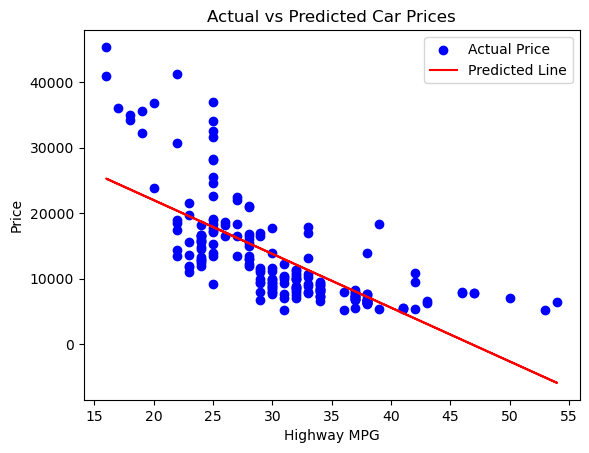

In [13]:
import matplotlib.pyplot as plt

plt.scatter(df_cleaned['highway-mpg'], df_cleaned['price'], color='blue', label='Actual Price')
plt.plot(df_cleaned['highway-mpg'], df_cleaned['Predicted Price'], color='red', label='Predicted Line')
plt.xlabel("Highway MPG")
plt.ylabel("Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.show()

#### MULTIPLE LINEAR REGRESSION

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Clean column names for consistency (optional but recommended)
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '-')

# 2. Replace '?' with NaN and convert relevant columns to numeric
columns_needed = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'price']
df_cleaned[columns_needed] = df_cleaned[columns_needed].replace('?', np.nan)
df_cleaned[columns_needed] = df_cleaned[columns_needed].apply(pd.to_numeric, errors='coerce')

# 3. Drop rows with any missing values in selected columns
df_cleaned = df_cleaned.dropna(subset=columns_needed)

# 4. Define input features (Z) and target variable (Y)
Z = df_cleaned[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df_cleaned['price']

# 5. Fit the multiple linear regression model
lm_multi = LinearRegression()
lm_multi.fit(Z, Y)

LinearRegression()

In [18]:
# 6. Predict using the model
Yhat_multi = lm_multi.predict(Z)

# 7. Add predictions to the DataFrame
df_cleaned['Predicted Price (Multi)'] = Yhat_multi

# 8. Show actual vs. predicted values
print(df_cleaned[['price', 'Predicted Price (Multi)']].head(10))

      price  Predicted Price (Multi)
0   13495.0             13741.398456
1   16500.0             13741.398456
2   16500.0             19088.015168
3   13950.0             10657.904247
4   17450.0             15557.062624
5   15250.0             13919.312268
6   17710.0             15490.464932
7   18920.0             16003.304080
8   23875.0             17628.339283
10  16430.0             10757.284489


In [23]:
# 9. Show model coefficients
print("\nIntercept (b0):", lm_multi.intercept_)
print("Coefficients (b1, b2, ...):", lm_multi.coef_)
print("Feature Names:", Z.columns.tolist())


Intercept (b0): -15700.573979039267
Coefficients (b1, b2, ...): [53.27878556  4.66217408 82.22948394 35.5175845 ]
Feature Names: ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']


#### MODEL EVALUATION USING VISUALIZATIONS

In [26]:
import seaborn as sns

(0.0, 48171.55956172685)

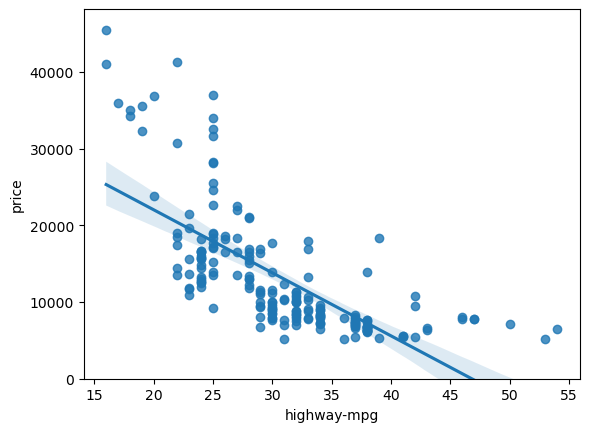

In [30]:
sns.regplot(x="highway-mpg", y="price", data=df_cleaned)
plt.ylim(0,)

<Axes: xlabel='highway-mpg', ylabel='price'>

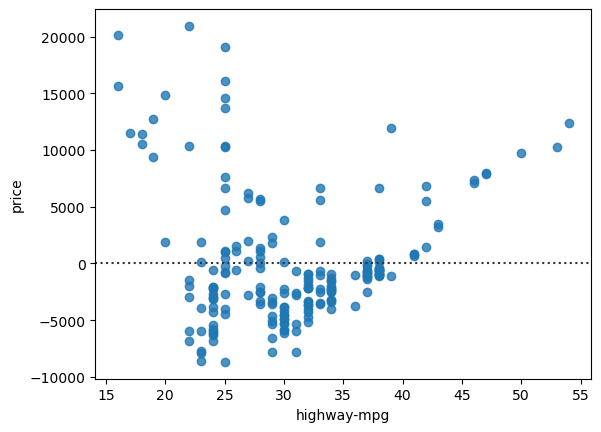

In [36]:
sns.residplot(x=df_cleaned['highway-mpg'], y=df_cleaned['price'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

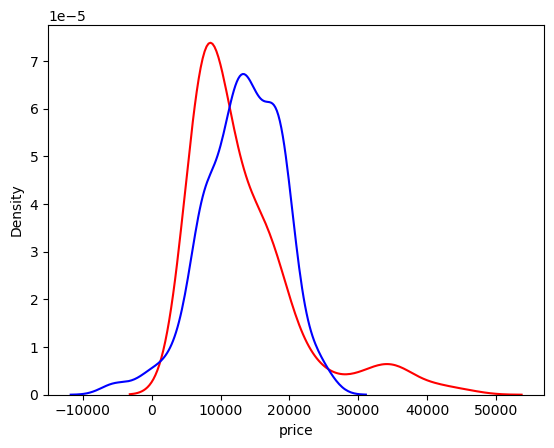

In [48]:
# Plot actual values
ax1 = sns.kdeplot(df_cleaned['price'], color="r", label="Actual Value")

# Plot predicted/fitted values
sns.kdeplot(Yhat, color="b", label="Fitted Values", ax=ax1)

#### POLYNOMIAL REGRESSION AND PIPELINES

In [68]:
import numpy as np

# Define x and y from your DataFrame
x = df_cleaned['highway-mpg']
y = df_cleaned['price']

# Fit a 3rd-degree polynomial
f = np.polyfit(x, y, 3)

# Create the polynomial function
p = np.poly1d(f)

print(p)

        3         2
-1.553 x + 204.3 x - 8948 x + 1.377e+05


#### Multidimentional polynomial regression

In [116]:
from sklearn.preprocessing import PolynomialFeatures

x = df_cleaned[['horsepower', 'curb-weight']]

# Create a PolynomialFeatures object
pr = PolynomialFeatures(degree=2, include_bias=False)

# Transform the selected features into polynomial features
x_polly = pr.fit_transform(x[['horsepower', 'curb-weight']])

print(x_polly)

[[1.1100000e+02 2.5480000e+03 1.2321000e+04 2.8282800e+05 6.4923040e+06]
 [1.1100000e+02 2.5480000e+03 1.2321000e+04 2.8282800e+05 6.4923040e+06]
 [1.5400000e+02 2.8230000e+03 2.3716000e+04 4.3474200e+05 7.9693290e+06]
 [1.0200000e+02 2.3370000e+03 1.0404000e+04 2.3837400e+05 5.4615690e+06]
 [1.1500000e+02 2.8240000e+03 1.3225000e+04 3.2476000e+05 7.9749760e+06]
 [1.1000000e+02 2.5070000e+03 1.2100000e+04 2.7577000e+05 6.2850490e+06]
 [1.1000000e+02 2.8440000e+03 1.2100000e+04 3.1284000e+05 8.0883360e+06]
 [1.1000000e+02 2.9540000e+03 1.2100000e+04 3.2494000e+05 8.7261160e+06]
 [1.4000000e+02 3.0860000e+03 1.9600000e+04 4.3204000e+05 9.5233960e+06]
 [1.0100000e+02 2.3950000e+03 1.0201000e+04 2.4189500e+05 5.7360250e+06]
 [1.0100000e+02 2.3950000e+03 1.0201000e+04 2.4189500e+05 5.7360250e+06]
 [1.2100000e+02 2.7100000e+03 1.4641000e+04 3.2791000e+05 7.3441000e+06]
 [1.2100000e+02 2.7650000e+03 1.4641000e+04 3.3456500e+05 7.6452250e+06]
 [1.2100000e+02 3.0550000e+03 1.4641000e+04 3.69655

#### Normalize multiple features

In [118]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select the features you want to scale
x_data = df_cleaned[['horsepower', 'highway-mpg']]

# Create the scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it
x_scaled = scaler.fit_transform(x_data)

# If you want the result as a DataFrame with the original column names:
x_scale = pd.DataFrame(x_scaled, columns=x_data.columns)

print(x_scale)

     horsepower  highway-mpg
0      0.202967    -0.539128
1      0.202967    -0.539128
2      1.350877    -0.685494
3     -0.037293    -0.100029
4      0.309749    -1.270959
..          ...          ...
194    0.283054    -0.392762
195    1.511051    -0.831860
196    0.816966    -1.124592
197    0.069489    -0.539128
198    0.283054    -0.831860

[199 rows x 2 columns]


#### PIPELINES

In [139]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Create the pipeline
model_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2)),
    ('scale', StandardScaler()),
    ('model', LinearRegression())
])

# Define input (X) and target (y)
X = df_cleaned[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df_cleaned['price']

# Fit the pipeline to the data
model_pipeline.fit(X, y)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('scale', StandardScaler()), ('model', LinearRegression())])

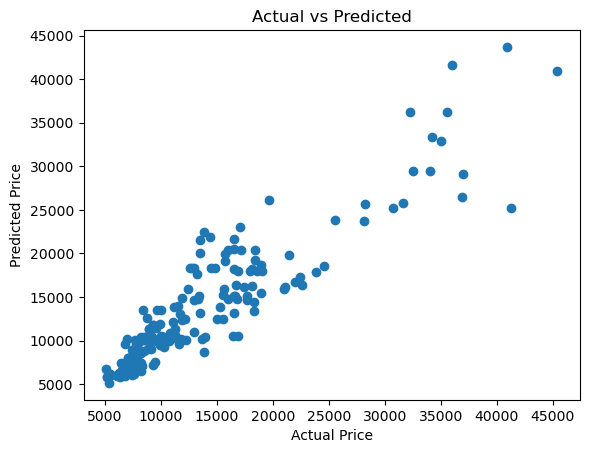

In [141]:
# Correct prediction step
yhat = model_pipeline.predict(X)

# Optional: compare with actual values
import matplotlib.pyplot as plt

plt.scatter(y, yhat)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


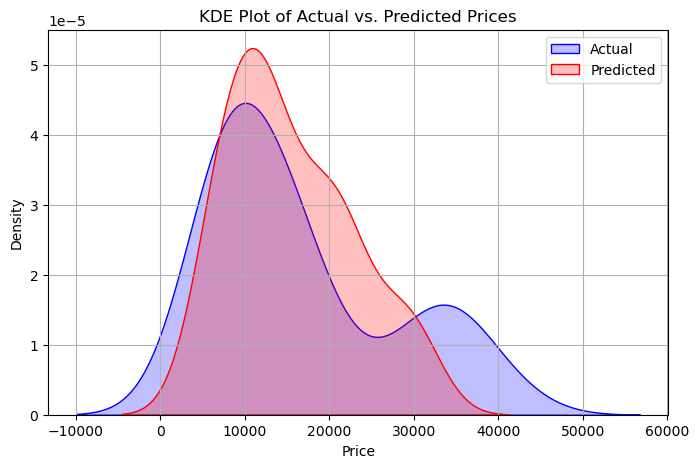

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

# Define features and target
X = df_cleaned[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df_cleaned['price']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
model_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2)),
    ('scale', StandardScaler()),
    ('model', LinearRegression())
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# KDE Plot of Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label='Actual', fill=True, color='blue')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='red')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('KDE Plot of Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

  Observations:

	1.	Systematic Underprediction for Expensive Cars:
 
	-	The red curve (predicted) drops off much earlier than the blue curve.
	-	Your model struggles to predict higher-priced vehicles — it compresses the range, underestimating expensive cars.
 
	2.	Good Alignment in the Mid-Range:
	-	The peaks of both curves align fairly well around the lower-to-mid price range (e.g., ~10,000–20,000).
 
	3.	Slight Bias Toward the Mean:
	-	The predicted distribution is narrower and more peaked, suggesting the model regresses toward the mean. This is common with linear regression, especially without regularization.

#### MEASURES FOR IN-SAMPLE EVALUATION

#### Mean Squared Error (MSE)

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target
X = df_cleaned[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df_cleaned['price']

# Train simple linear regression
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Compute MSE
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 11941505.191703444


#### R-squares / R^2

In [183]:
X = df_cleaned[['highway-mpg']]
Y = df_cleaned['price']

lm.fit(X,Y)
lm.score(X,y) # approx. 49,7 % of the variation of price is explained by the simple regression model

0.4973491560296689

#### PREDICTION AND DECISION MAKING

In [190]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Fit the model
lm = LinearRegression()
lm.fit(df_cleaned[['highway-mpg']], df_cleaned['price'])

# Predict for highway-mpg = 30.0
prediction = lm.predict(np.array(30.0).reshape(-1, 1))
print("Predicted price for highway-mpg=30:", prediction[0])

# View the coefficient and intercept
print("Coefficient:", lm.coef_[0])
print("Intercept:", lm.intercept_)

Predicted price for highway-mpg=30: 13804.862523681084
Coefficient: -821.5047221509941
Intercept: 38450.00418821091


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [194]:
new_input=np.arange(1,101,1).reshape(-1,1)
print(new_input)

[[  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]]


In [198]:
yhat = lm.predict(new_input)
print(yhat)

[ 37628.49946606  36806.99474391  35985.49002176  35163.98529961
  34342.48057746  33520.9758553   32699.47113315  31877.966411
  31056.46168885  30234.9569667   29413.45224455  28591.9475224
  27770.44280025  26948.9380781   26127.43335595  25305.9286338
  24484.42391164  23662.91918949  22841.41446734  22019.90974519
  21198.40502304  20376.90030089  19555.39557874  18733.89085659
  17912.38613444  17090.88141229  16269.37669013  15447.87196798
  14626.36724583  13804.86252368  12983.35780153  12161.85307938
  11340.34835723  10518.84363508   9697.33891293   8875.83419078
   8054.32946862   7232.82474647   6411.32002432   5589.81530217
   4768.31058002   3946.80585787   3125.30113572   2303.79641357
   1482.29169142    660.78696927   -160.71775289   -982.22247504
  -1803.72719719  -2625.23191934  -3446.73664149  -4268.24136364
  -5089.74608579  -5911.25080794  -6732.75553009  -7554.26025224
  -8375.7649744   -9197.26969655 -10018.7744187  -10840.27914085
 -11661.783863   -12483.28858

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
